In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv


<h1> Exploratory Data Analysis on US Accidents Dataset</h1>
In this EDA I'm trying to answer the below questions-

1. Which states has the most number of accidents? 
2. Why does new york doesnt show up in top 10 accident data even when having most population (referred from google) 
3. Among the top 100 cities in number of accidents ,which states do they belong the most frequently 
4. Are there more accidents in warmer or colder areas?
5. What time of the day are accidents most frequent in? 
6. What days of the week have the most accidents? 
7. Which months have the most accidents? 
8. What is the trend of accidents over a year(decresing /increasing)?

**But before Answering all the questions we should First Clean and prepare our data for Analysis purpose.**


<h2>Data Cleaning and Preparation</h2>

1. Look the file using pandas* 
2. look at some information about the data & the columns
3. fix any missing or incorrect values


In [2]:
#1- looking the data
df=pd.read_csv('/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv')

In [3]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
#2 looking at info about data and columns
df.info()
[]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

[]

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [7]:
#to find numeric data types from our dataset
numeric=['int16','int32','int64','float16','float32','float64']
numeric_Df=df.select_dtypes(include=numeric)
len(numeric_Df.columns)

14

In [8]:
##3.1 finding missing values


df.isna().sum()
#above statement gives us count of missing values per columns


ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

**Now finding percentage of missing values per column**

In [9]:
#first sort out missing values columns
df.isna().sum().sort_values(ascending=False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [10]:
##3.2 finding missing percentage
# missing percentage
missing_percentages=df.isna().sum().sort_values(ascending=False)/len(df)*100
# below at number (Number                   6.129003e-01) means 61% of data is null) 

In [11]:
###3.3 removing all the columns with 0 missing percentages from missing_percentage 
missing_percentages=missing_percentages[missing_percentages>0]
missing_percentages

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
dtype: float64

<AxesSubplot:>

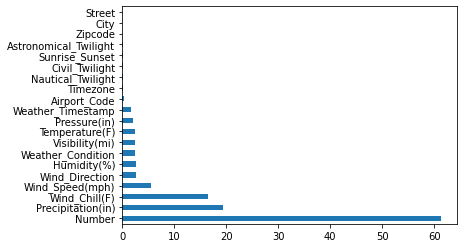

In [12]:
missing_percentages.plot(kind='barh')

If you see for any column where missing values are more than half of the overall dataset ...then its probably not that useful.



In [13]:
#removing columns which we dont want to use
# to_remove=missing_percentages[missing_percentages>50]

# toremove=list(to_remove.keys())
# df.drop(toremove[0],axis=1, inplace=True)
df.shape

(2845342, 47)

# Exploratory Analysis and Visualization

**Below are some columns we will be exploring-**
1. City
1. Start time 
1. Start lat,start long
1. Temperature
1. Weather conditions





**First Column - City**

In [14]:
#name of unique cities
cities=df.City.unique()
# no of unique cities in the data set
len(cities)

11682

# Insight 1
**There are 11682 cities listed in this US Dataset.** 
There were 19,502 incorporated places registered in the United States as of July 31, 2019. 

In [15]:
#calcuating number of accident per city
cities_by_accident=df.City.value_counts()
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

<AxesSubplot:>

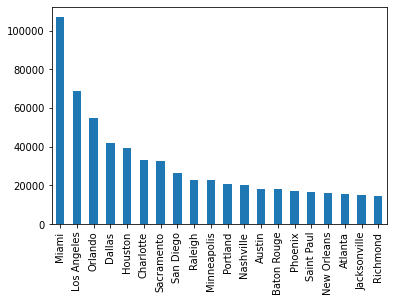

In [16]:
cities_by_accident[:20].plot(kind='bar')

# Insight 2
Above plot shows top 20 places having maximum number of accidents, also shows how **Miami** reported largest amount of accidents, in comparison to any other cities in USA.


In [17]:
high_accident_cities=cities_by_accident[cities_by_accident>=1000]
low_accident_cities=cities_by_accident[cities_by_accident<1000]
print(len(high_accident_cities))
print(len(high_accident_cities)/len(cities)*100)
len(low_accident_cities)/len(cities)*100



496
4.245848313644924


95.74559150830338

# Insight 3
**4.24%** Cities reported more than 1000 accident cases. 

<AxesSubplot:xlabel='City', ylabel='Count'>

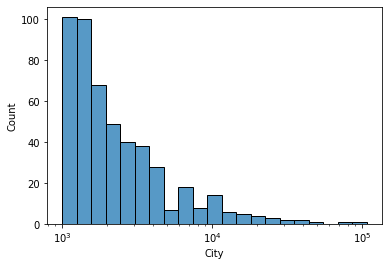

In [18]:
import seaborn as sns
sns.histplot(high_accident_cities,log_scale=True)

<AxesSubplot:xlabel='City', ylabel='Count'>

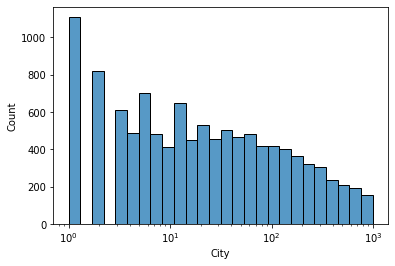

In [19]:
sns.histplot(low_accident_cities,log_scale=True)

# Insight 4
**Above graph tells us more than 1000 cities have submitted no of accidents as 1.**

In [20]:
low_accident_cities[low_accident_cities==1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

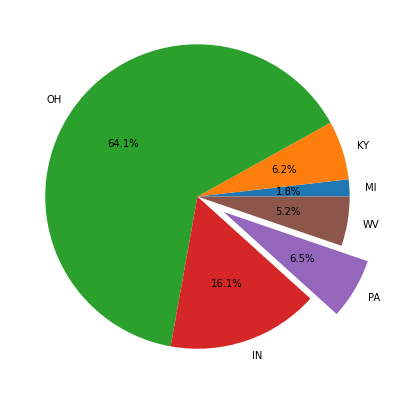

In [21]:
#states having highest numbers of Accidents
high_s=list(high_accident_cities.keys())
state_list=[]
for i in range(len(high_s)):
    state_list.append(df.State[i])
state_list=list(state_list)
state_unique_list=list(set(state_list))

state_unique_list_counts=[]

for s in state_unique_list:
    state_unique_list_counts.append(state_list.count(s))
state_unique_list_counts

import matplotlib.pyplot as plt

myexplode=[0, 0, 0, 0,0.2,0]
plt.figure(figsize=(7,7))
plt.pie(state_unique_list_counts,labels=state_unique_list,autopct='%0.01f%%',explode = myexplode)
plt.show()


# Answer 1- OHIO state reported the most number of accidents

In [22]:
'New York' in df.City
'N Y' in df.State
#this clarifies the 3rd question... because data does not contain new york data(should be mentioned Important)

False

# Answer 2- This Dataset does not consists any data of New York 

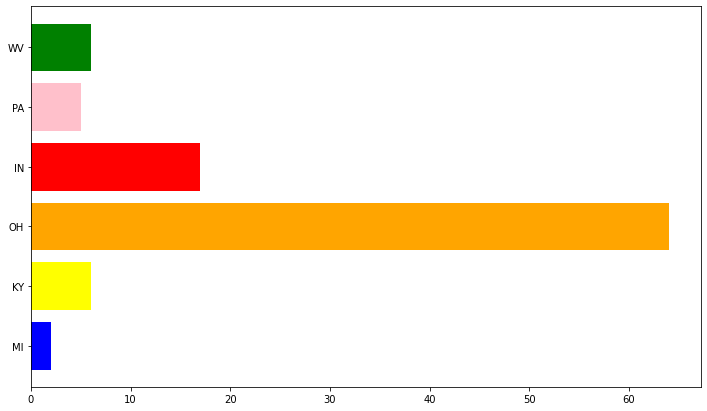

In [23]:
# Among the top 100 cities in number of accidents ,which states do they belong the most frequently
top_100_cities=list(cities_by_accident[:100].keys())
# for city in top_100_cities:
state_list_2=[]
for i in range(len(top_100_cities)):
    state_list_2.append(df.State[i])
s2=list(set(state_list_2))
nlis=[]
for state in s2:
    nlis.append(state_list_2.count(state))
plt.figure(figsize=(12,7))
plt.barh(s2,nlis,color=['blue','yellow','orange','red','Pink','green'])
plt.show()

  
    


# Answer 3-Among top 100 cities which reported most number of accidents ...64 of the cities are listed from OHIO.

**2nd column Start time**

In [24]:
df.Start_Time
# start_time is present in df in string format

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [25]:
import datetime as dt
#converting in datetime object
df.Start_Time=pd.to_datetime(df.Start_Time)
df.Start_Time[4]



Timestamp('2016-02-08 07:53:43')

In [26]:
#getting hour from the time stamp
df['Start_Time'].dt.hour.value_counts()

17    220358
16    218385
15    214264
14    191480
18    168982
13    166473
12    143715
7     135191
8     130879
19    116911
11    113271
6     111160
9     108779
10    103926
20     94682
21     87078
22     81188
5      80303
23     74243
0      68800
1      59370
2      55443
4      51805
3      48656
Name: Start_Time, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

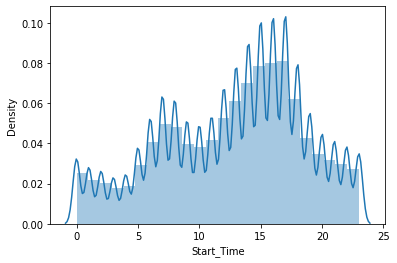

In [27]:
sns.distplot(df['Start_Time'].dt.hour,bins=24)

# Answer 4 - High percent of accidents occured in between 1PM to 5PM 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

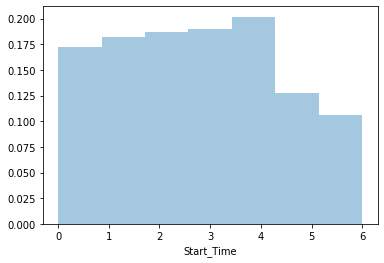

In [28]:
# finding day of the week for each accident

sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True)

# Answer 5-Most of the accidents took place on workdays, on the other hand weekend have comparatively less amount of accidents.


Checking if the distribution of accidents  by the hour the same on weekdays as on weekends.


<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

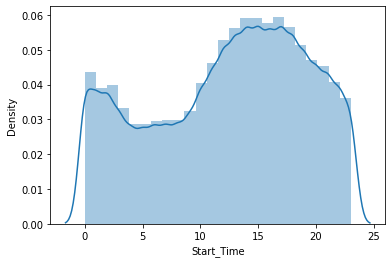

In [29]:
sunday_df=df.Start_Time[df.Start_Time.dt.dayofweek==6]

sns.distplot(sunday_df.dt.hour,bins=24,norm_hist=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

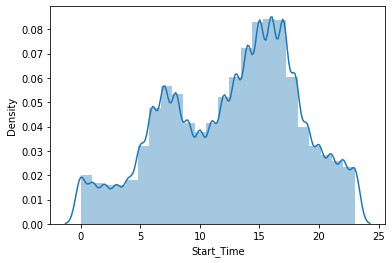

In [30]:
# comparing sunday data with monday
monday_df=df.Start_Time[df.Start_Time.dt.dayofweek==0]
# monday_df
sns.distplot(monday_df.dt.hour,bins=24,norm_hist=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

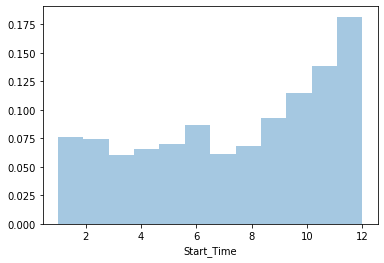

In [31]:
#figuring out which month reported most number of accidents
sns.distplot(df.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

# Answer 6- December month reported most numbers of accidents. 

<AxesSubplot:xlabel='Start_Time'>

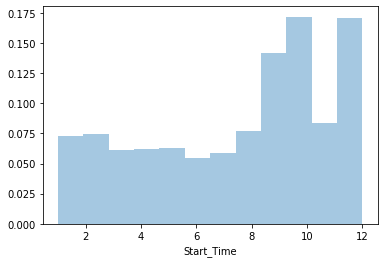

In [32]:
# checking for the perticular year 2019 to understand above trend
data_2019=df[df.Start_Time.dt.year==2019]
sns.distplot(data_2019.Start_Time.dt.month,norm_hist=True,kde=False,bins=12)

<AxesSubplot:xlabel='Start_Time'>

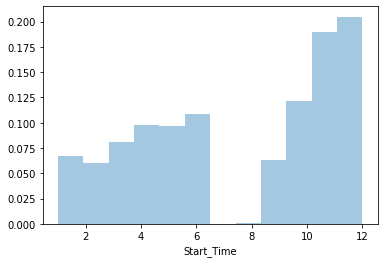

In [33]:
# checking for the perticular year 2020 
data_2020=df[df.Start_Time.dt.year==2020]
sns.distplot(data_2020.Start_Time.dt.month,norm_hist=True,kde=False,bins=12)

# Insight 5
2020's data consists some missing information as there is no record of accidents in July and August.

<AxesSubplot:xlabel='Start_Time'>

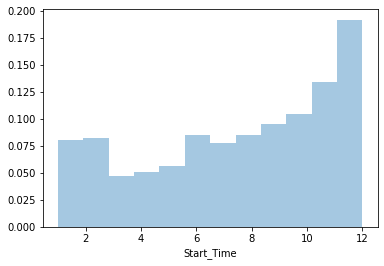

In [34]:
# checking for the perticular year 2019 to understand above trend
data_2021=df[df.Start_Time.dt.year==2021]
sns.distplot(data_2021.Start_Time.dt.month,norm_hist=True,kde=False,bins=12)

# Insight 6
<h2>Comparing year-wise accidents data</h2>
October, November and December shows peak number of accidents reported.
Keeping in mind Winters starts from december, So if the winters and snowfalls were the reason, January and February should also show the similar data but here from above trend analysis ,we can see peak ends in December and January and February have below average accidents reported. 

**Column-3 Start Latitude and Longitude**

In [35]:
#3 start analysing with start latitude and Longitude
# df.Start_Lat# for up and down
df.Start_Lng# for left and right


0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

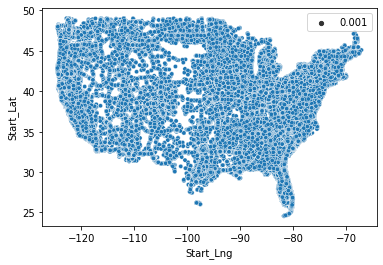

In [36]:
# making scatter plot of both
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat,size=0.001)

**Above Scatter plot Depicts the map of USA**

<h3>Plotting above data in maps using folium</h3>
<br>
**From above dataset we took 10 random locations to plot in our folium Map.**

In [37]:
import folium
import random
map=folium.Map()
for i in range (10):
    n=random.randint(1,40000)
    marker=folium.Marker((df.Start_Lat[n],df.Start_Lng[n]))
    marker.add_to(map)
map

<h2>Below Is a heatmap of all the records in the Dataset</h2>

In [38]:
#creating heatmap on the map
from folium.plugins import HeatMap
lat_long_data=list(zip(list(df.Start_Lat),list(df.Start_Lng)))

map=folium.Map()
HeatMap(lat_long_data[:int(len(lat_long_data)*0.01)]).add_to(map)
map

**Column-4 Temperature**

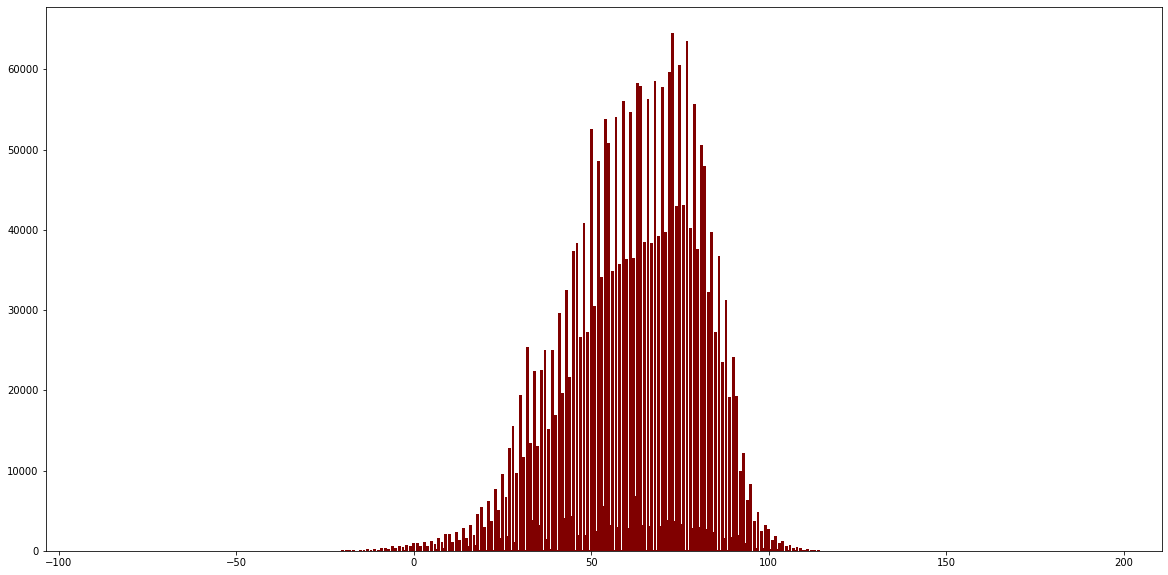

In [39]:
top_with_temp=df['Temperature(F)'].value_counts().sort_values(ascending=False)
# top_with_temp[:3]
top_with_temp_counts=list(top_with_temp)
top_with_temp=list(top_with_temp.keys())
plt.figure(figsize=(20,10))
plt.bar(top_with_temp,top_with_temp_counts,color ='maroon')
plt.show()

# Insight 7
From above graph we can properly prove our point that **snowfall or winters had no major affect over the accidents** as more than **75%** of accidents seems to be happend when temperature was in between **40 to 70 Fahrenheit**.

<h2>Column-5 Weather conditions</h2>

<AxesSubplot:ylabel='Weather_Condition'>

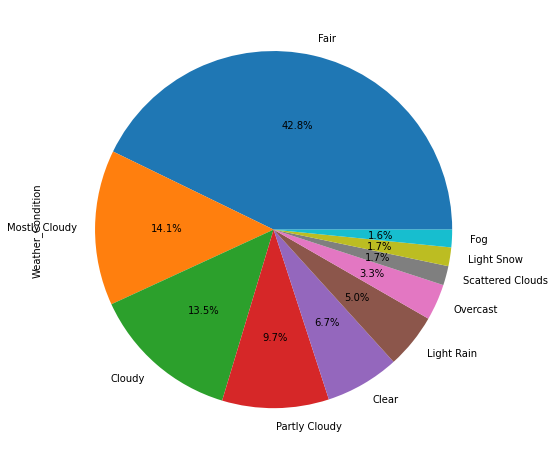

In [40]:
plt.figure(figsize=(8,15))
df.Weather_Condition.value_counts()[:10].plot(kind='pie',autopct='%0.01f%%')


In [41]:
#states where weather conditions were fair and still aciidents happened
df['State'][df['Weather_Condition']=='Fair'].value_counts().sum()



1107194

# Insight 8
**1107194** is the number of accidents happened in **Fair** weather conditions.

<AxesSubplot:ylabel='Frequency'>

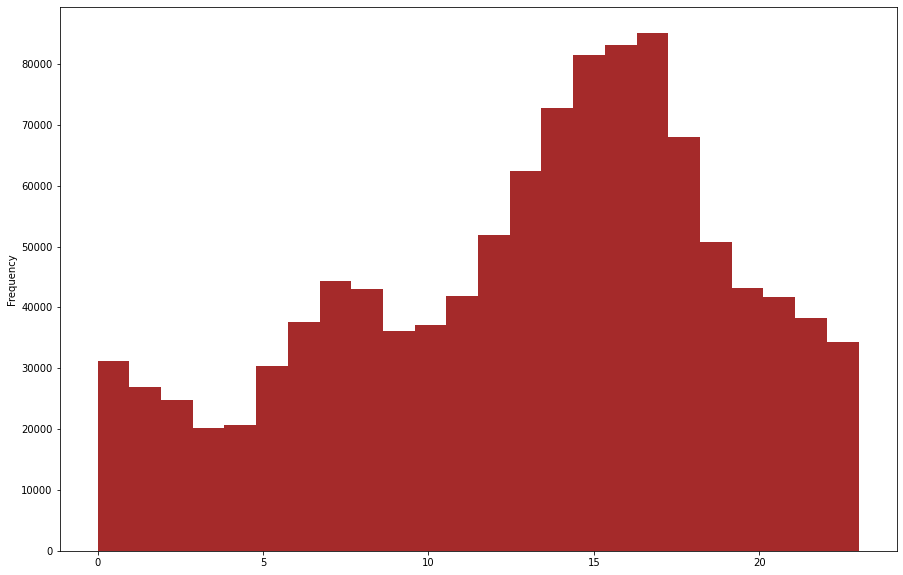

In [42]:
fair_weather_df=df[df['Weather_Condition']=='Fair']
state_fair_weather_df=fair_weather_df['Start_Time'].dt.hour
plt.figure(figsize=(15,10))
state_fair_weather_df.plot(kind='hist', color='brown',bins=24)

# Insight 9
**Most of the accidents which had weather condition as Fair happend between 1-5PM**

lets just check accidents which did not happen between 1 to 5pm ...what weather condition they had

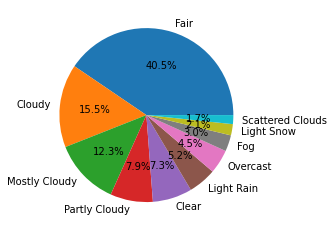

In [43]:

weather_before_1PM_df=df[df['Start_Time'].dt.hour<12]
weather_before_1PM_df['Weather_Condition'].value_counts()
plt.pie(weather_before_1PM_df['Weather_Condition'].value_counts()[:10],labels=list(weather_before_1PM_df['Weather_Condition'].value_counts().keys())[:10],autopct='%0.01f%%')
plt.show()



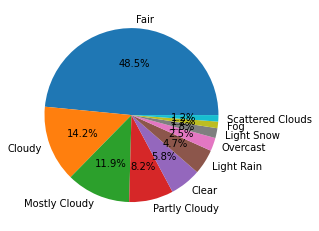

In [44]:

weather_after_5PM_df=df[df['Start_Time'].dt.hour>17]
weather_after_5PM_df['Weather_Condition'].value_counts()
plt.pie(weather_after_5PM_df['Weather_Condition'].value_counts()[:10],labels=list(weather_after_5PM_df['Weather_Condition'].value_counts().keys())[:10],autopct='%0.01f%%')
plt.show()

# Insight 10
From above analysis we can say there is **no co-relation** between **Timing and Weather Conditions**.

# Summary And Conclusion
<h2>Top findings-</h2>


1. Cities like Miami(106966), Los Angeles(68956) and Orlando(54691) has reported most number of accidents.
1. From 11682 cities 496 cities reported more than 1000 accident cases which is 4.24% of total cities.
1. 1110 Number of cities reported only 1 accident which should be clarified.
1. OHIO State reported the most number of accidents which is 64% of total accidents.
1. Having in mind that new york has the most number of population, we got to know this dataset does not consists any data from New York.
1. High percent of accidents occured in between 1PM to 5PM.
1. Most of the accidents took place on workdays, on the other hand weekend have comparatively less amount of accidents.
1. December month reported most numbers of accidents in last three consecutive year(2019,2020,2021).
1. Winter is not a factor of incresed accidents in December.
1. More than 75% of accidents seems to be happend when temperature was in between 40 to 70 Fahrenheit.
1. 1107194 is the number of accidents happened in fair weather conditions.
1. There is no co-relation between Timing and Weather Conditions.
